In [1]:
import pandas as pd

In [2]:
pd.set_option('display.max_rows', 100)

In [3]:
import seaborn as sns

/home/maciek/miniconda/lib/python2.7/site-packages/IPython/html.py:14: ShimWarning: The `IPython.html` package has been deprecated. You should import from `notebook` instead. `IPython.html.widgets` has moved to `ipywidgets`.
  "`IPython.html.widgets` has moved to `ipywidgets`.", ShimWarning)


In [4]:
%matplotlib inline

In [5]:
# raport = pd.concat(
#     (pd.read_csv('dude_horizontal_dock_final.csv', index_col=0),
#     pd.read_csv('dude_horizontal_dude_final.csv', index_col=0),
#     pd.read_csv('dude_horizontal_vina_final.csv', index_col=0))).reset_index(drop=True)

In [6]:
raport_per_target = pd.read_csv('dude_per_target_final.csv', index_col=0)
raport_per_target.drop('head', axis=1, inplace=True)
raport_per_target['n_folds'] = 5
raport_per_target['kind'] = 'Per Target'

raport_per_target['engine'].replace('dock', 'Dock 6.6', inplace=True)
raport_per_target['engine'].replace('dude', 'Dock 3.6', inplace=True)
raport_per_target['engine'].replace('vina', 'Autodock Vina', inplace=True)

raport_per_target['v'] = 'RF_v' + raport_per_target['v'].astype(str)
raport_per_target.rename(columns={'v':'score'}, inplace=True)

raport_per_target = raport_per_target.groupby(('engine', 'kind', 'score', 'n_folds', 'dude_id')).mean().reset_index()

In [7]:
raport_per_target.groupby(('engine', 'kind', 'score', 'n_folds')).mean().to_excel('dude_raport_per_target.xls')

In [8]:
raport_classic = pd.read_csv('dude_classical_final_nfolds.csv', index_col=0)
raport_classic.rename(columns={'auc':'roc_auc', 'log_auc': 'roc_log_auc'}, inplace=True)
# add missing colums
raport_classic['n_folds'] = 0
raport_classic['accuracy'] = None
raport_classic['precision'] = None
raport_classic['recall'] = None

raport_classic['kind'] = 'Horizontal'#'Classical'

In [9]:
raport_classic.columns

Index([u'engine', u'score', u'ef0.1', u'ef1', u'ef10', u'ef1_perc', u'ef2',
       u'ef5', u'mse', u'rk', u'rk_active', u'rk_inactive', u'roc_auc',
       u'roc_log_auc', u'rp', u'rp_active', u'rp_inactive', u'rs',
       u'rs_active', u'rs_inactive', u'n_folds', u'accuracy', u'precision',
       u'recall', u'kind'],
      dtype='object')

In [10]:
# raport_horizontal = pd.read_csv('dude_horizontal_final_multitarget.csv', index_col=0)
raport_horizontal = pd.read_csv('dude_horizontal_final.csv', index_col=0)

raport_horizontal.drop('head',axis=1, inplace=True)

# rename 'v' to 'scores'
raport_horizontal['v'] = 'RF_v' + raport_horizontal['v'].astype(int).astype(str)
raport_horizontal.rename(columns={'v':'score'}, inplace=True)
raport_horizontal['n_folds'] = 5

raport_horizontal['kind'] = 'Horizontal'

In [11]:
raport_horizontal_multitarget = pd.read_csv('dude_horizontal_final_multitarget.csv', index_col=0)
# raport_horizontal = pd.read_csv('dude_horizontal_final.csv', index_col=0)

raport_horizontal_multitarget.drop('head',axis=1, inplace=True)

# rename 'v' to 'scores'
raport_horizontal_multitarget['v'] = 'RF_v' + raport_horizontal_multitarget['v'].astype(int).astype(str)
raport_horizontal_multitarget.rename(columns={'v':'score'}, inplace=True)
raport_horizontal_multitarget['n_folds'] = 5

raport_horizontal_multitarget['kind'] = 'Horizontal Multitarget'

raport_horizontal_multitarget['engine'].replace('dock', 'Dock 6.6', inplace=True)
raport_horizontal_multitarget['engine'].replace('dude', 'Dock 3.6', inplace=True)
raport_horizontal_multitarget['engine'].replace('vina', 'Autodock Vina', inplace=True)

In [12]:
raport_vertical = pd.read_csv('dude_vertical_final.csv', index_col=0)
raport_vertical.drop('head',axis=1, inplace=True)

#raport_vertical = raport_vertical[raport_vertical.n_folds == 20]

# rename 'v' to 'scores'
raport_vertical['v'] = 'RF_v' + raport_vertical['v'].astype(int).astype(str)
raport_vertical.rename(columns={'v':'score'}, inplace=True)

raport_vertical['rk_inactive'] = 0
raport_vertical['rp_inactive'] = 0
raport_vertical['rs_inactive'] = 0

raport_vertical['kind'] = 'Vertical'

In [13]:
raport_vertical_loo = pd.read_csv('dude_vertical_loo_final.csv', index_col=0).dropna()
#raport_vertical_loo.drop('head',axis=1, inplace=True)

# rename 'v' to 'scores'
raport_vertical_loo['v'] = 'RF_v' + raport_vertical_loo['v'].astype(int).astype(str)
raport_vertical_loo.rename(columns={'v':'score'}, inplace=True)

raport_vertical_loo['kind'] = 'Vertical LOO'

In [14]:
raport_vertical_loo_seed_10 = pd.read_csv('dude_vertical_loo_seed_final_10proc.csv', index_col=0).dropna()
#raport_vertical_loo_seed_10.drop('head',axis=1, inplace=True)

# rename 'v' to 'scores'
raport_vertical_loo_seed_10['v'] = 'RF_v' + raport_vertical_loo_seed_10['v'].astype(int).astype(str)
raport_vertical_loo_seed_10.rename(columns={'v':'score'}, inplace=True)

raport_vertical_loo_seed_10['kind'] = 'Vertical LOO + seed (10% actives)'

In [15]:
raport_vertical.columns

Index([u'accuracy', u'ef0.1', u'ef1', u'ef10', u'ef1_perc', u'ef2', u'ef5',
       u'engine', u'mse', u'precision', u'recall', u'rk', u'rk_active',
       u'rk_inactive', u'roc_auc', u'roc_log_auc', u'rp', u'rp_active',
       u'rp_inactive', u'rs', u'rs_active', u'rs_inactive', u'score',
       u'n_folds', u'kind'],
      dtype='object')

In [16]:
cols = raport_vertical.columns
#cols = ['engine', 'kind', 'score', 'ef1', 'roc_auc']
raport = pd.concat((raport_classic[cols],
                    raport_vertical[cols],
#                     raport_vertical_loo[cols],
#                     raport_vertical_loo_seed_10[cols],
                    raport_horizontal[cols],
                    raport_per_target[cols],
                   ))#

In [17]:
#drop v5
raport = raport[raport.score != 'RF_v5']

In [18]:
raport_final = raport.copy()
# adjust names
raport_final['engine'].replace('dock', 'Dock 6.6', inplace=True)
raport_final['engine'].replace('dude', 'Dock 3.6', inplace=True)
raport_final['engine'].replace('vina', 'Autodock Vina', inplace=True)

raport_final['score'].replace('chemscore', 'Chemscore', inplace=True)
raport_final['score'].replace('d_score', 'D score', inplace=True)
raport_final['score'].replace('g_score', 'G score', inplace=True)
raport_final['score'].replace('pmf_score', 'PMF score', inplace=True)

raport_final['score'].replace('native', 'Native', inplace=True)
#raport_final.loc[raport_final['score'] == 'native', 'score'] = raport_final[raport_final['score'] == 'native']['engine']


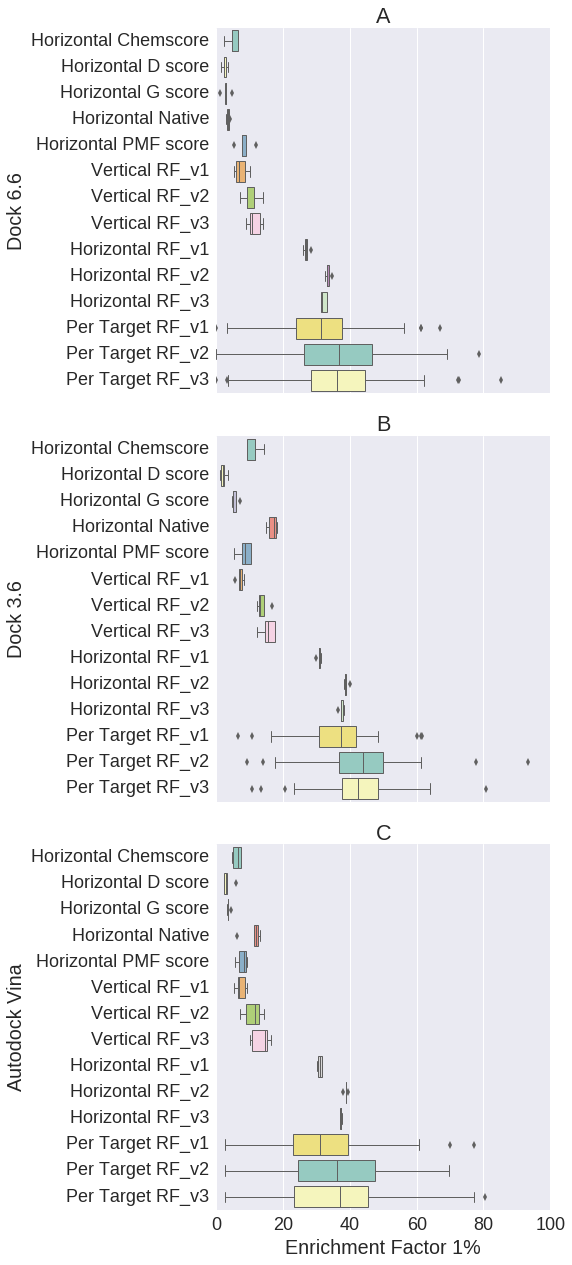

In [19]:
data2 = raport_final.copy()
#data2 = data2[(data2.engine == 'Dock 3.6') & (data2.kind.str.startswith('Vertical'))]
data2['score'] = data2['kind'] + ' ' + data2['score']
# data2 = data2[data2.kind.str.startswith('Vertical') | data2.kind.str.startswith('Horizontal') & ~data2.score.str.startswith('RF')]

sns.set(font_scale=1.8)

#g = sns.factorplot(x="engine", y="ef1", hue="score", data=data2, size=7, kind="box", palette="Set3",)
g = sns.FacetGrid(row="engine", data=data2, size=6, sharey=True, sharex=True, aspect=1.4)
g.map(sns.boxplot, "ef1", "score", palette="Set3", linewidth=1.)

g.set_xlabels('Enrichment Factor 1%')
g.set_ylabels('Scoring Function')

g.set_titles('{row_name}')
for axes, i in zip(g.axes,['A','B','C']):
    ax = axes[0]
    ax.set_ylabel(ax.title.get_text())
    ax.set_title(i)
    #ax.yaxis.set_label_position("right")

#g.set_yticklabels(rotation=90)

# g.fig.tight_layout()
# g.savefig('dude_raport_boxplots_vertical.svg')
g.savefig('dude_raport_boxplots_all_1perc.png', dpi=300)